In [1]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
#from gen_merge import merge_energy_data as merge

c:\Users\Archer\Documents\Vscode\venv\p312_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv('../Gen_data/gen_hourly_MW_all.csv')
df.shape

(517743, 4)

In [3]:
df.describe

<bound method NDFrame.describe of                    datetime        Area Production Type  Generation (MW)
0       2022-01-01 00:00:00      BZN|ES         Biomass            526.0
1       2022-01-01 01:00:00      BZN|ES         Biomass            533.0
2       2022-01-01 02:00:00      BZN|ES         Biomass            524.0
3       2022-01-01 03:00:00      BZN|ES         Biomass            532.0
4       2022-01-01 04:00:00      BZN|ES         Biomass            528.0
...                     ...         ...             ...              ...
517738  2024-12-31 19:00:00  Spain (ES)    Wind Onshore           1704.0
517739  2024-12-31 20:00:00  Spain (ES)    Wind Onshore           1907.0
517740  2024-12-31 21:00:00  Spain (ES)    Wind Onshore           2026.0
517741  2024-12-31 22:00:00  Spain (ES)    Wind Onshore           2428.0
517742  2024-12-31 23:00:00  Spain (ES)    Wind Onshore           2739.0

[517743 rows x 4 columns]>

In [4]:
df.isna().sum()

datetime           0
Area               0
Production Type    0
Generation (MW)    0
dtype: int64

In [5]:
area = "Spain (ES)"
ptype = "Wind Onshore"

df_filtered = df[(df["Area"] == area) & (df["Production Type"] == ptype)].copy()

df_filtered = df_filtered.rename(columns={
    "datetime": "ds",
    "Generation (MW)": "y"
})

df_filtered["ds"] = pd.to_datetime(df_filtered["ds"])

In [6]:
model = Prophet(
    daily_seasonality=True,
    weekly_seasonality=True,
    yearly_seasonality=True
)
model.fit(df_filtered)

18:39:15 - cmdstanpy - INFO - Chain [1] start processing
18:39:16 - cmdstanpy - INFO - Chain [1] done processing


In [7]:
future = model.make_future_dataframe(periods=24*30, freq='h')  # 未来30天，每小时
forecast = model.predict(future)

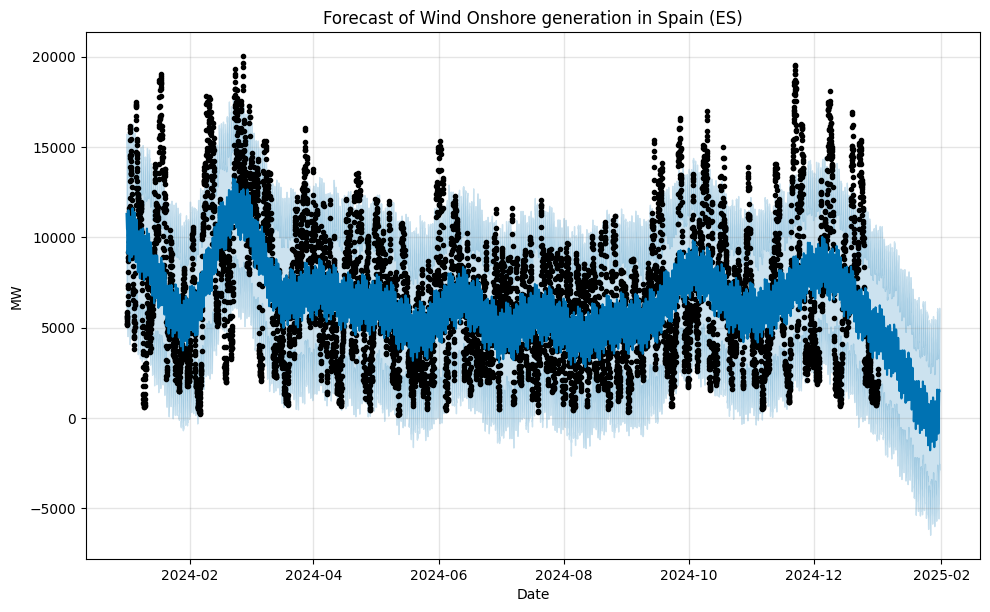

In [8]:
model.plot(forecast)
plt.title(f"Forecast of {ptype} generation in {area}")
plt.xlabel("Date")
plt.ylabel("MW")
plt.show()

18:39:18 - cmdstanpy - INFO - Chain [1] start processing
18:39:29 - cmdstanpy - INFO - Chain [1] done processing


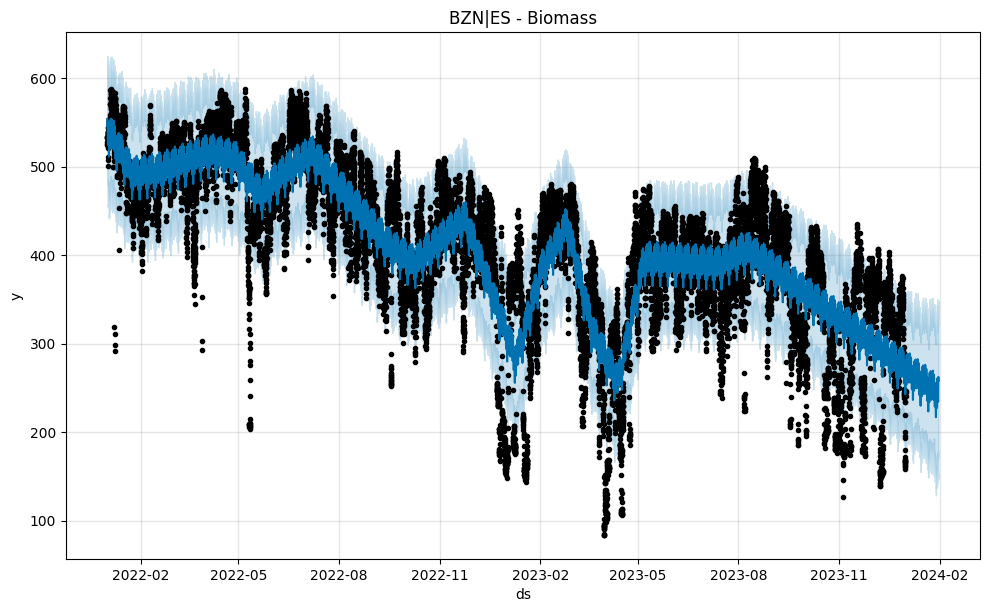

Skip BZN|ES - Fossil Brown coal/Lignite: Generation is 0 MW
Skip BZN|ES - Fossil Coal-derived gas: Generation is 0 MW


18:39:33 - cmdstanpy - INFO - Chain [1] start processing
18:39:41 - cmdstanpy - INFO - Chain [1] done processing


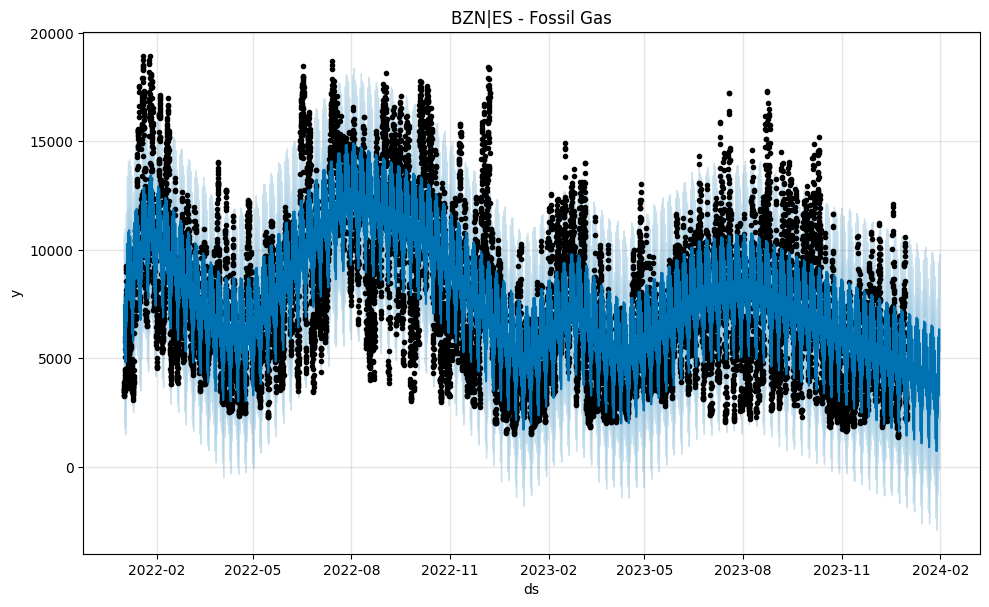

18:39:44 - cmdstanpy - INFO - Chain [1] start processing
18:39:56 - cmdstanpy - INFO - Chain [1] done processing


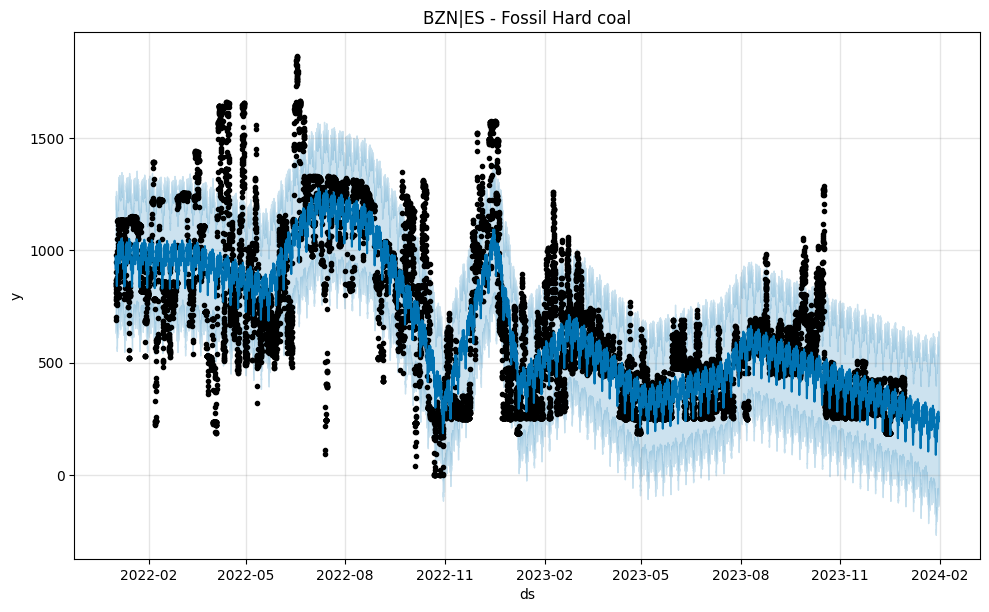

18:39:59 - cmdstanpy - INFO - Chain [1] start processing
18:40:08 - cmdstanpy - INFO - Chain [1] done processing


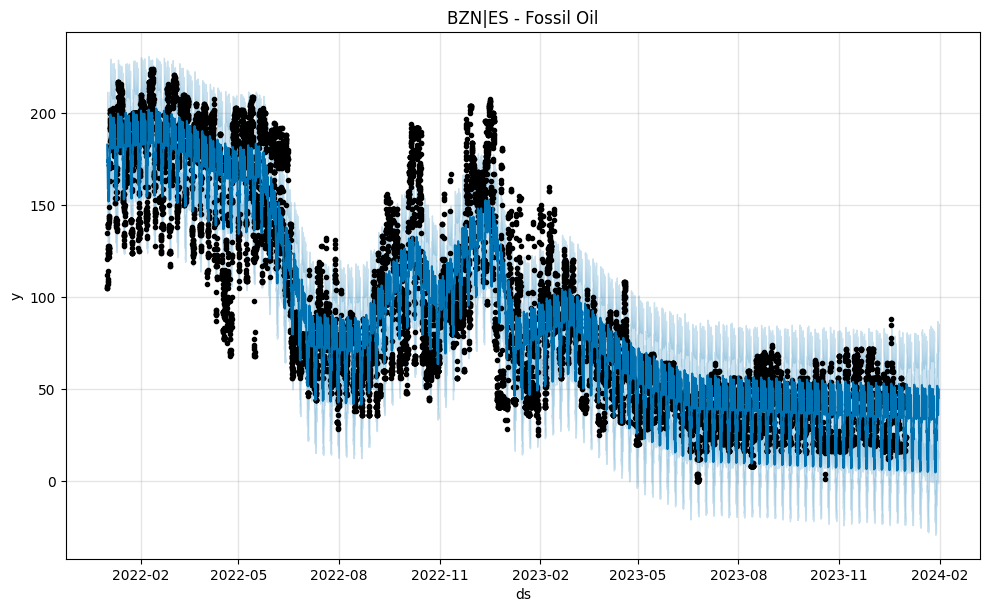

Skip BZN|ES - Fossil Oil shale: Generation is 0 MW
Skip BZN|ES - Fossil Peat: Generation is 0 MW
Skip BZN|ES - Geothermal: Generation is 0 MW


18:40:11 - cmdstanpy - INFO - Chain [1] start processing
18:40:12 - cmdstanpy - INFO - Chain [1] done processing


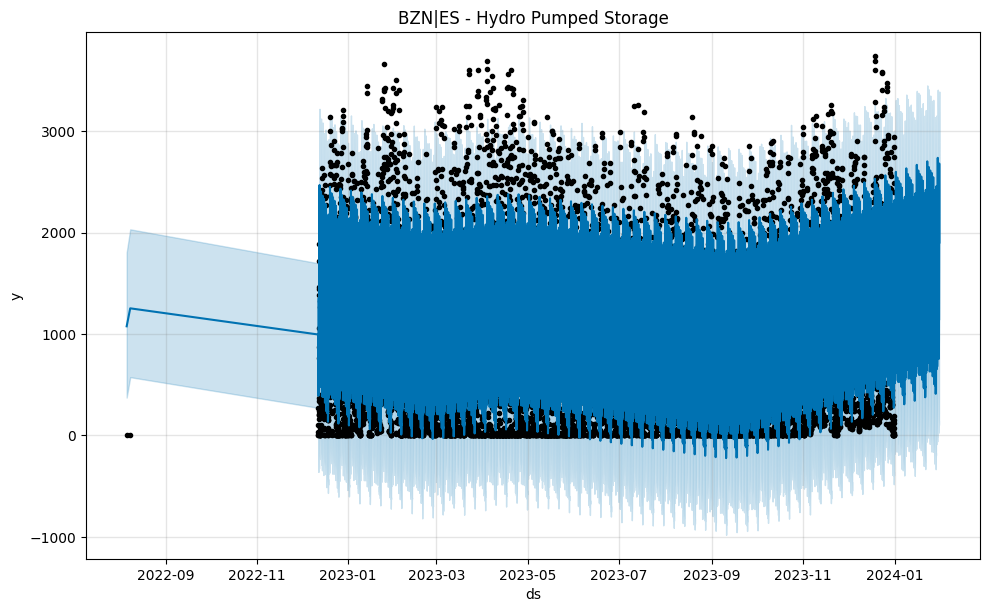

18:40:15 - cmdstanpy - INFO - Chain [1] start processing
18:40:27 - cmdstanpy - INFO - Chain [1] done processing


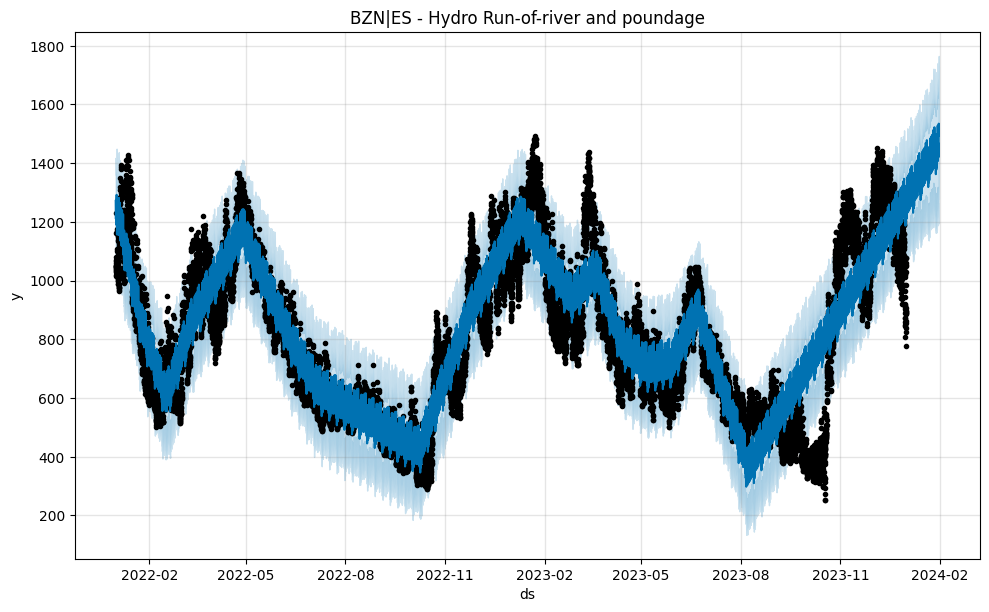

18:40:30 - cmdstanpy - INFO - Chain [1] start processing
18:40:36 - cmdstanpy - INFO - Chain [1] done processing


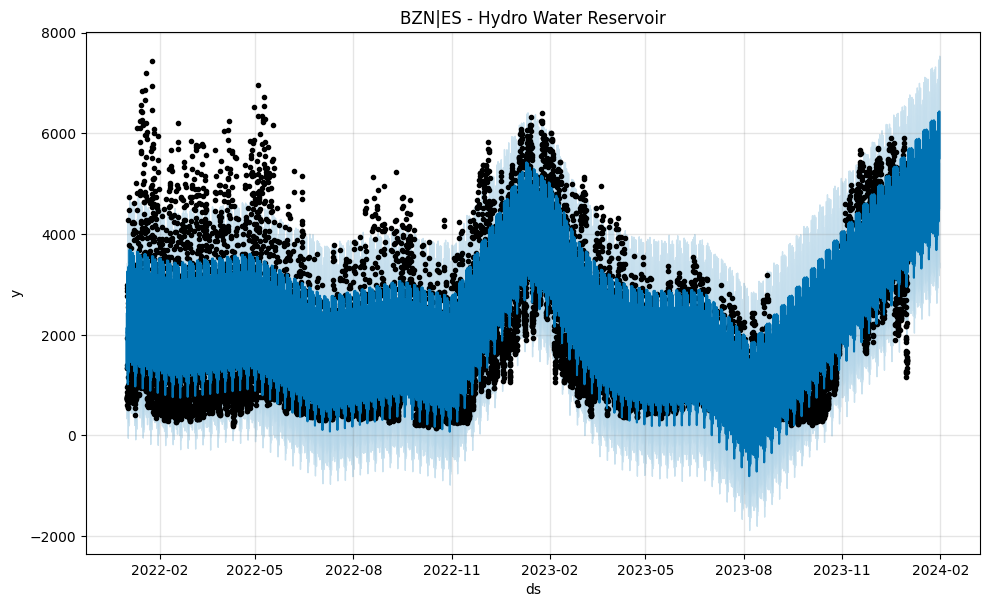

Skip BZN|ES - Marine: Generation is 0 MW


18:40:40 - cmdstanpy - INFO - Chain [1] start processing
18:40:50 - cmdstanpy - INFO - Chain [1] done processing


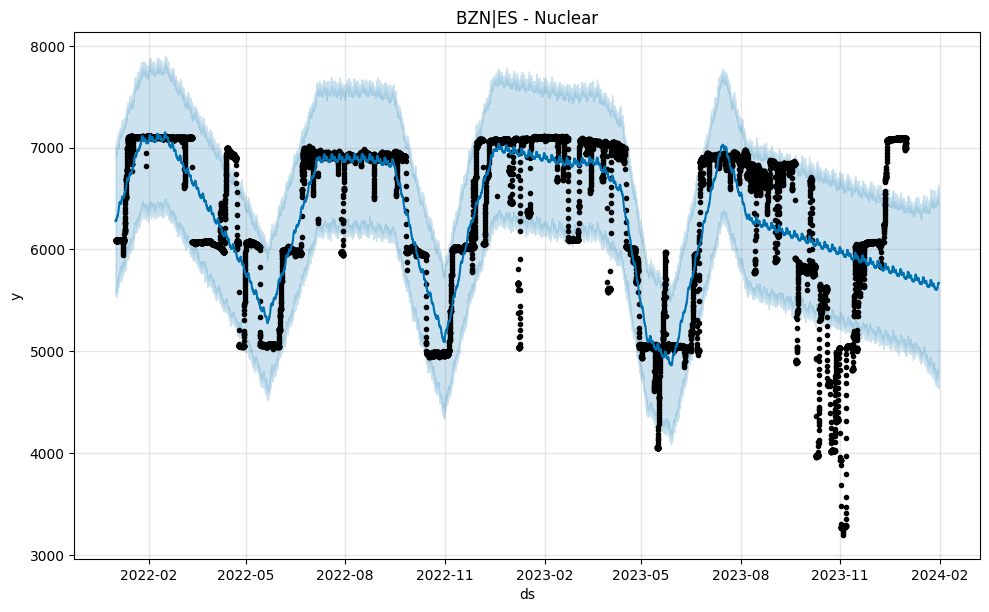

18:40:53 - cmdstanpy - INFO - Chain [1] start processing
18:41:01 - cmdstanpy - INFO - Chain [1] done processing


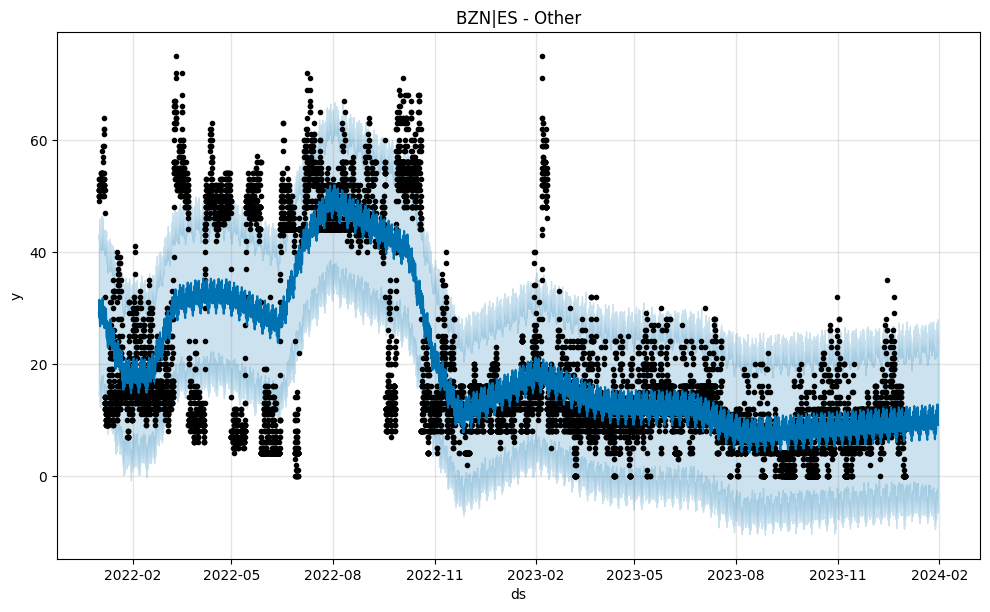

18:41:05 - cmdstanpy - INFO - Chain [1] start processing
18:41:12 - cmdstanpy - INFO - Chain [1] done processing


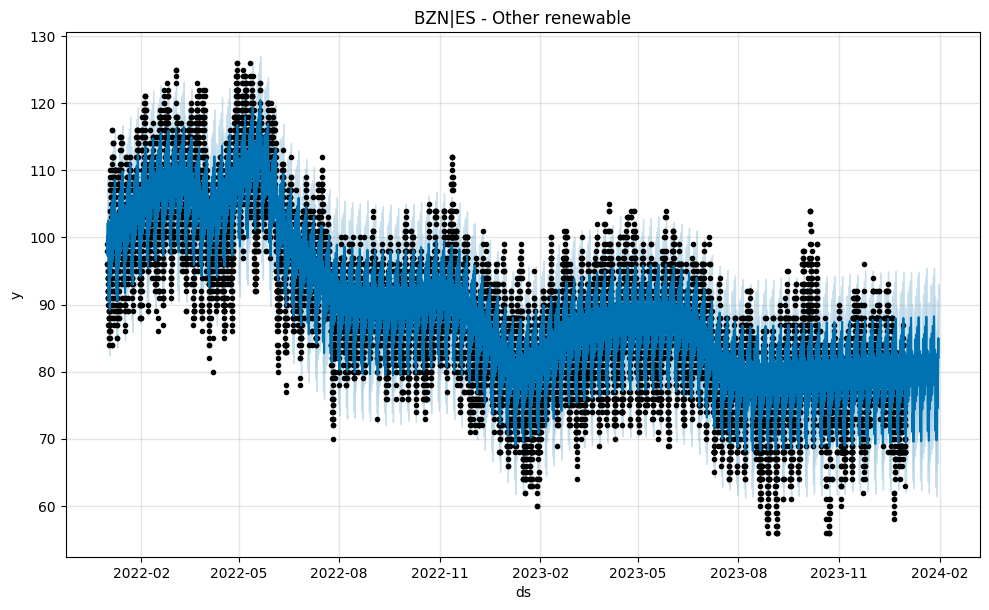

18:41:15 - cmdstanpy - INFO - Chain [1] start processing
18:41:21 - cmdstanpy - INFO - Chain [1] done processing


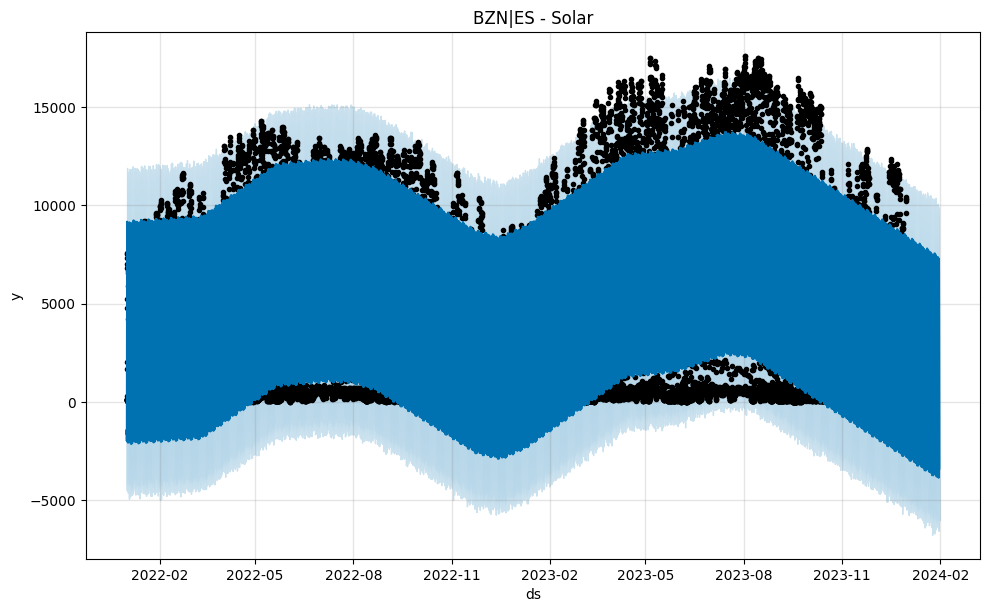

18:41:24 - cmdstanpy - INFO - Chain [1] start processing
18:41:34 - cmdstanpy - INFO - Chain [1] done processing


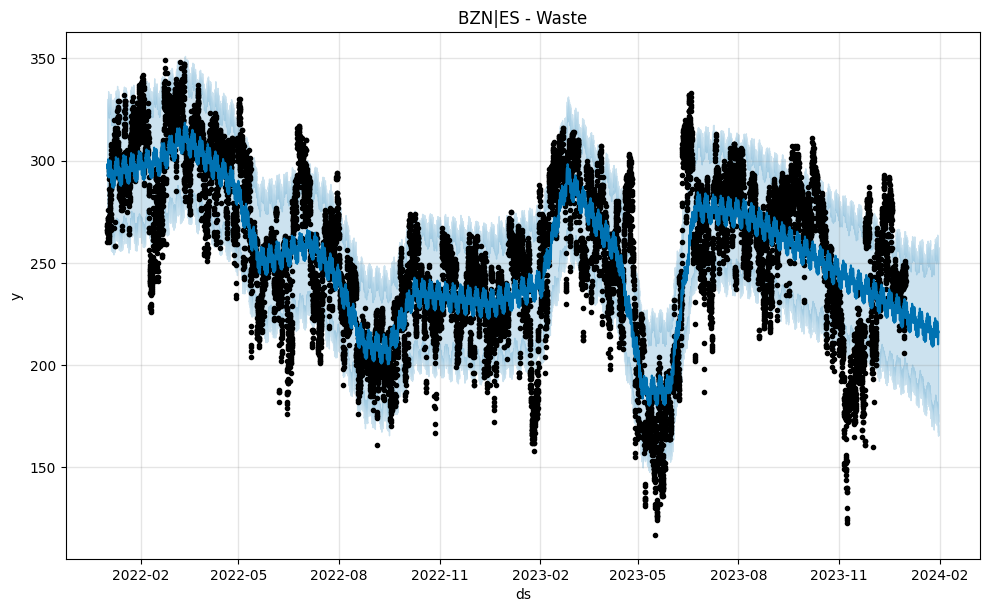

Skip BZN|ES - Wind Offshore: Generation is 0 MW


18:41:37 - cmdstanpy - INFO - Chain [1] start processing
18:41:40 - cmdstanpy - INFO - Chain [1] done processing


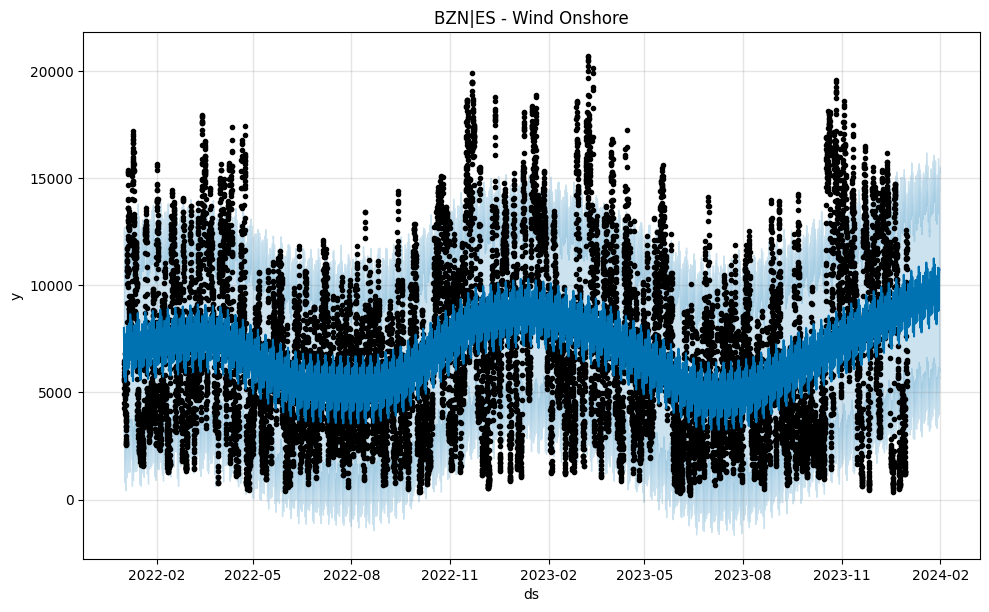

18:41:44 - cmdstanpy - INFO - Chain [1] start processing
18:41:46 - cmdstanpy - INFO - Chain [1] done processing


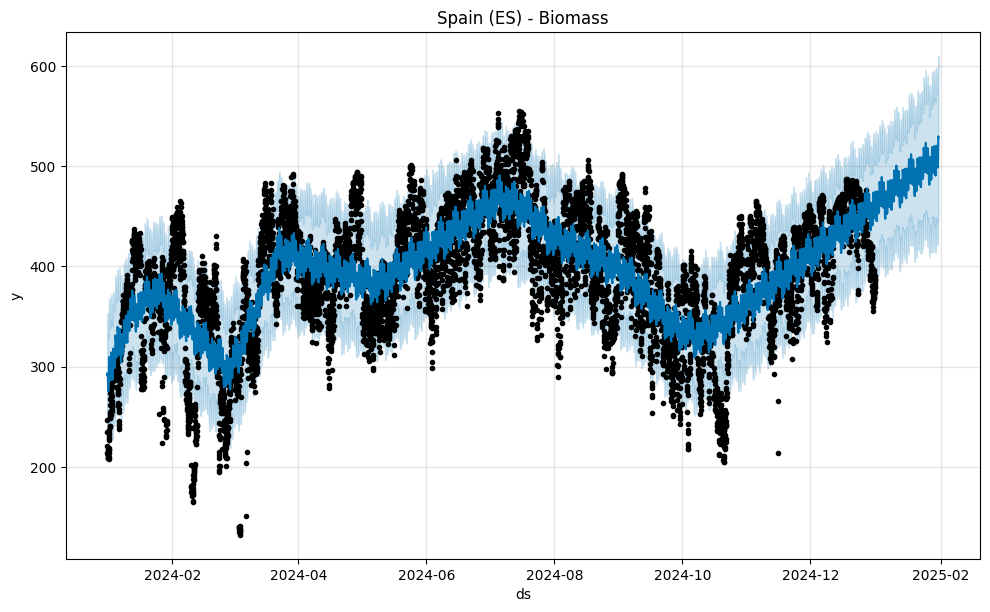

Skip Spain (ES) - Fossil Brown coal/Lignite: Generation is 0 MW
Skip Spain (ES) - Fossil Coal-derived gas: Generation is 0 MW


18:41:49 - cmdstanpy - INFO - Chain [1] start processing
18:41:50 - cmdstanpy - INFO - Chain [1] done processing


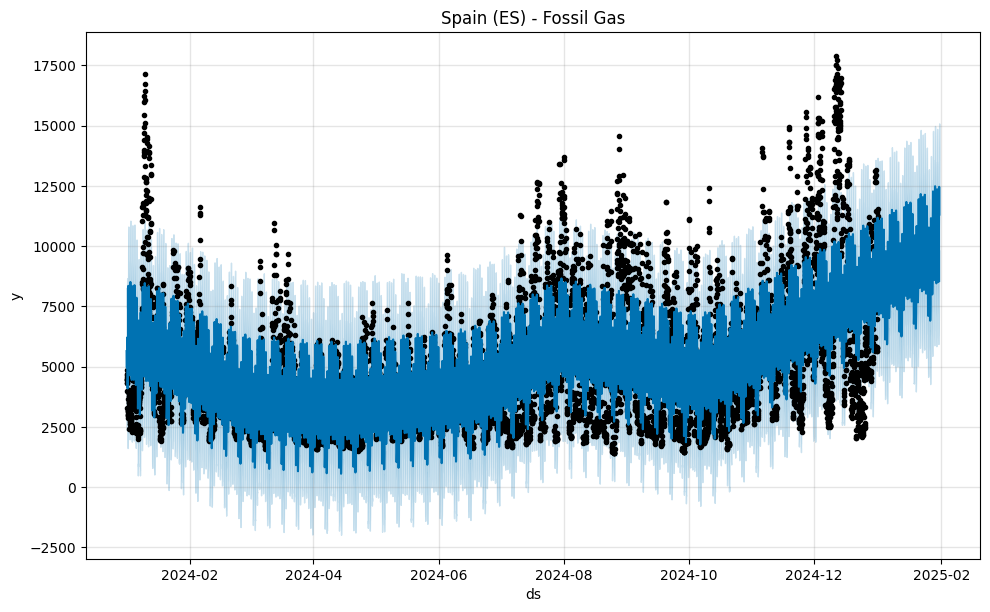

18:41:52 - cmdstanpy - INFO - Chain [1] start processing
18:41:54 - cmdstanpy - INFO - Chain [1] done processing


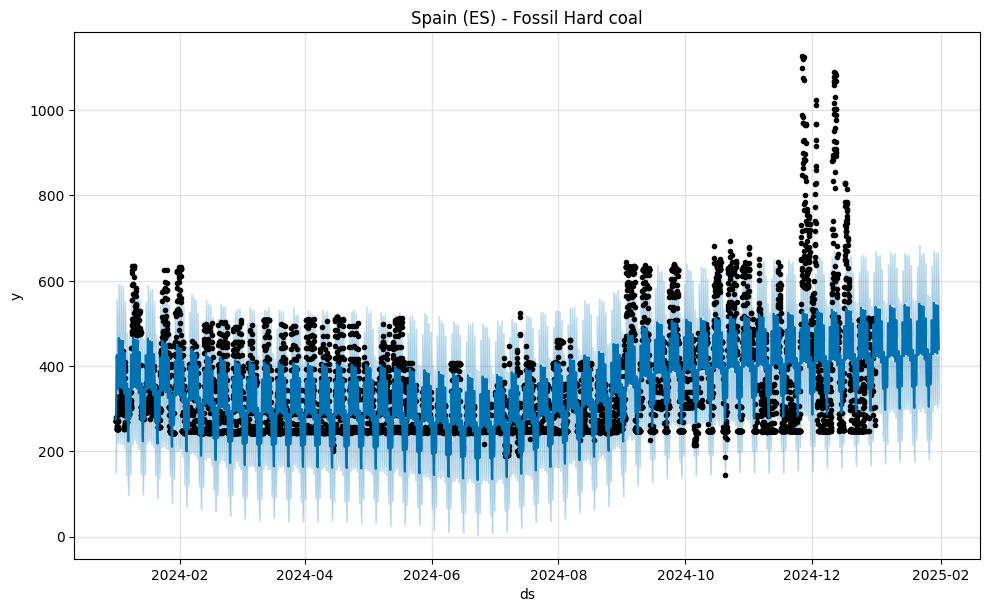

18:41:56 - cmdstanpy - INFO - Chain [1] start processing
18:41:58 - cmdstanpy - INFO - Chain [1] done processing


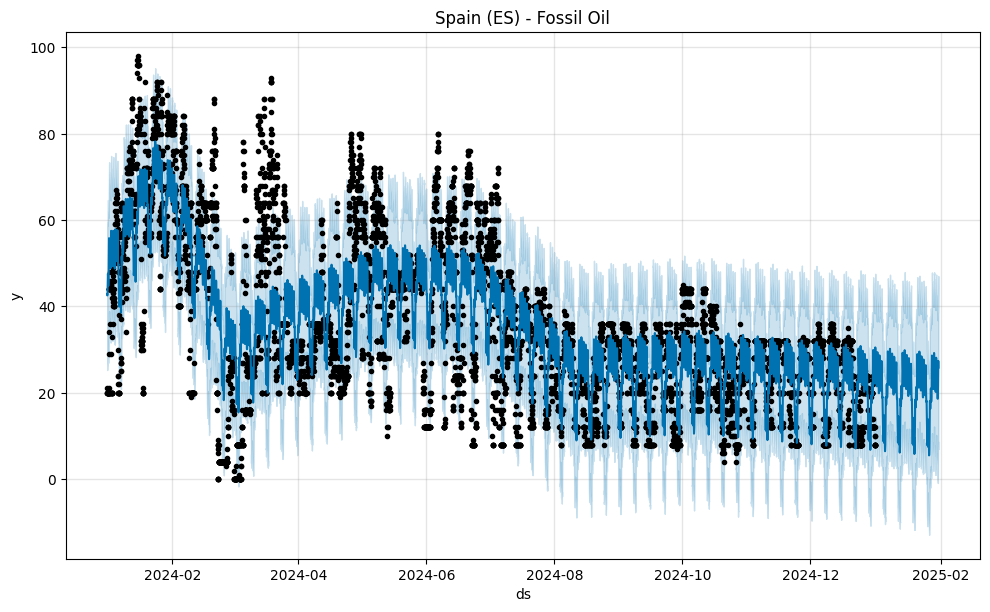

Skip Spain (ES) - Fossil Oil shale: Generation is 0 MW
Skip Spain (ES) - Fossil Peat: Generation is 0 MW
Skip Spain (ES) - Geothermal: Generation is 0 MW


18:42:00 - cmdstanpy - INFO - Chain [1] start processing
18:42:00 - cmdstanpy - INFO - Chain [1] done processing


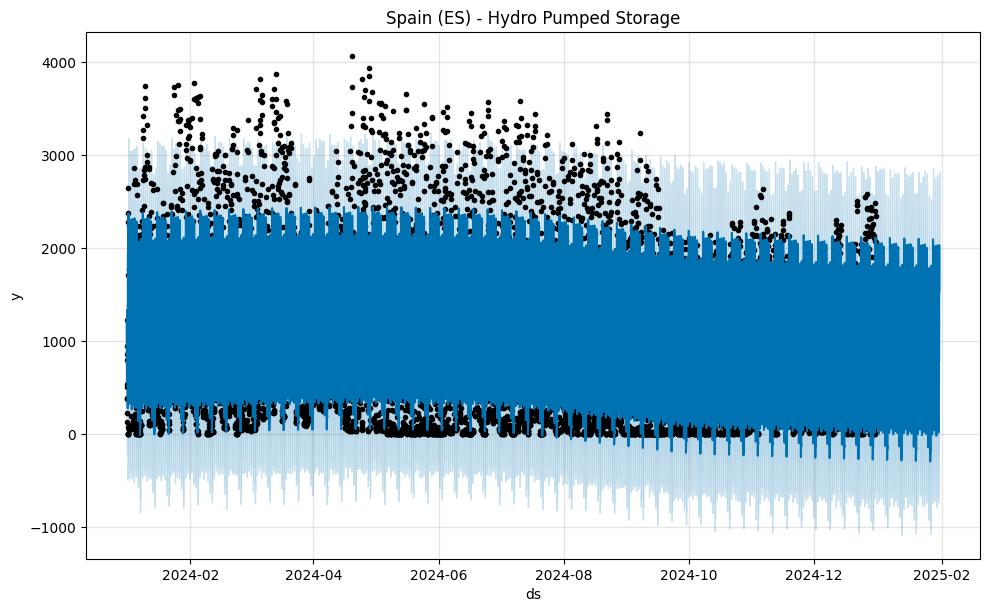

18:42:02 - cmdstanpy - INFO - Chain [1] start processing
18:42:06 - cmdstanpy - INFO - Chain [1] done processing


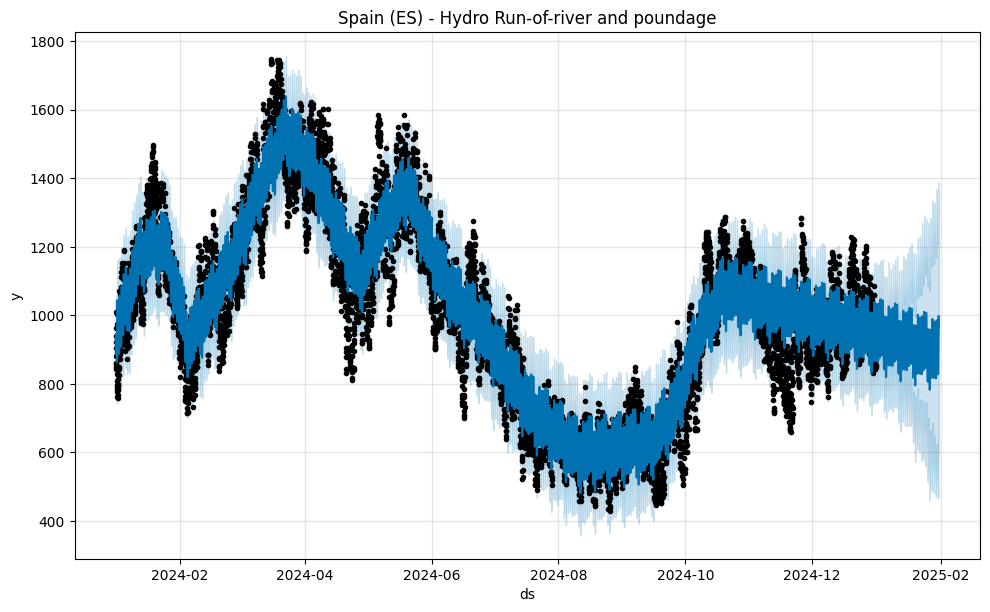

18:42:09 - cmdstanpy - INFO - Chain [1] start processing
18:42:10 - cmdstanpy - INFO - Chain [1] done processing


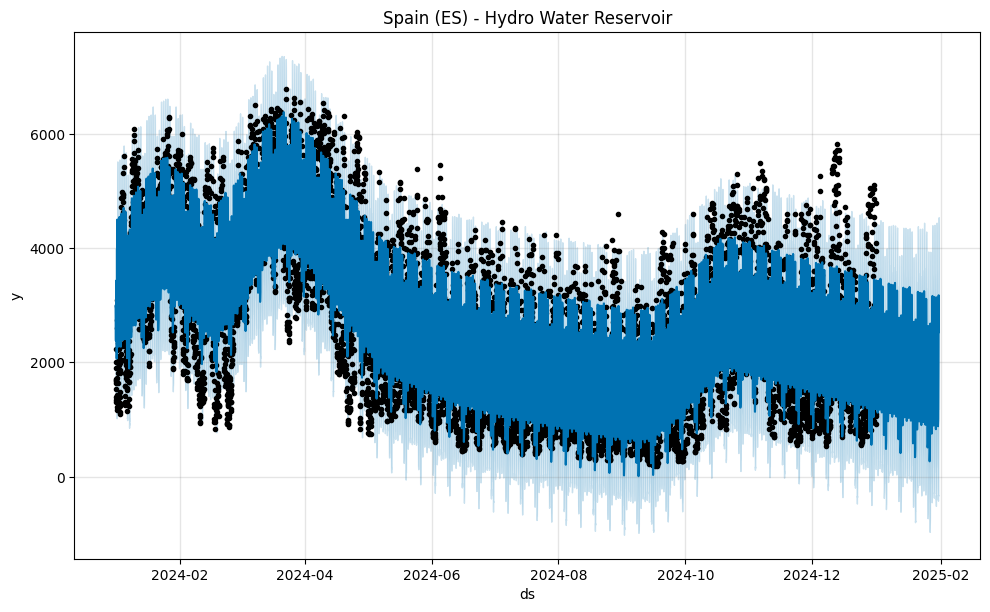

Skip Spain (ES) - Marine: Generation is 0 MW


18:42:13 - cmdstanpy - INFO - Chain [1] start processing
18:42:16 - cmdstanpy - INFO - Chain [1] done processing


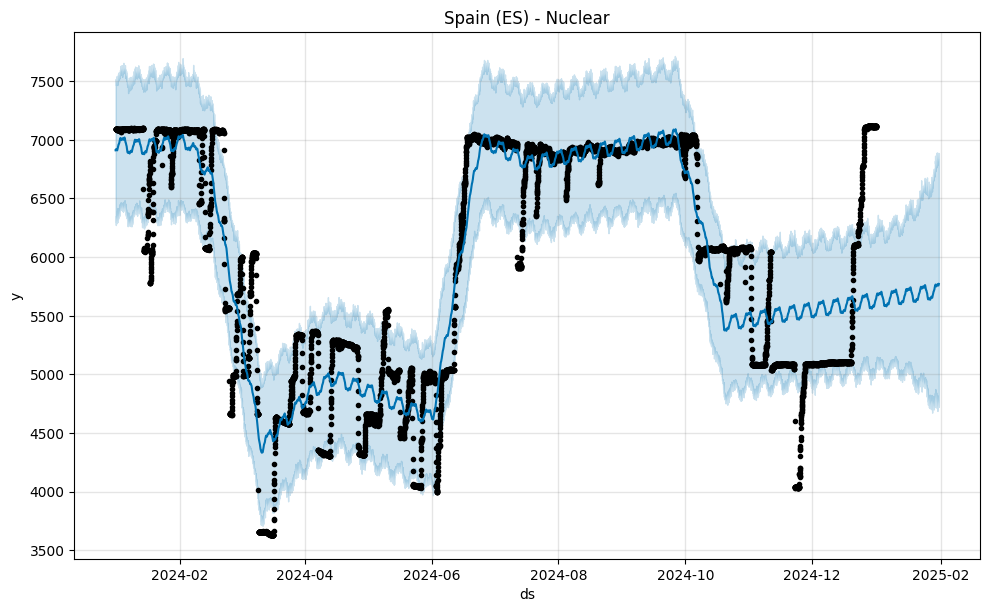

18:42:18 - cmdstanpy - INFO - Chain [1] start processing
18:42:20 - cmdstanpy - INFO - Chain [1] done processing


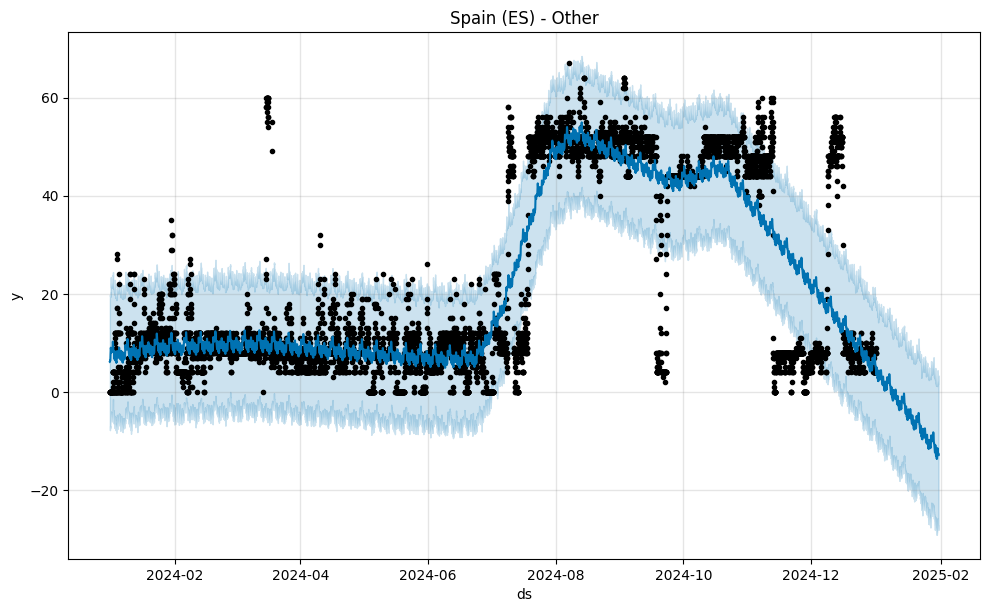

18:42:22 - cmdstanpy - INFO - Chain [1] start processing
18:42:26 - cmdstanpy - INFO - Chain [1] done processing


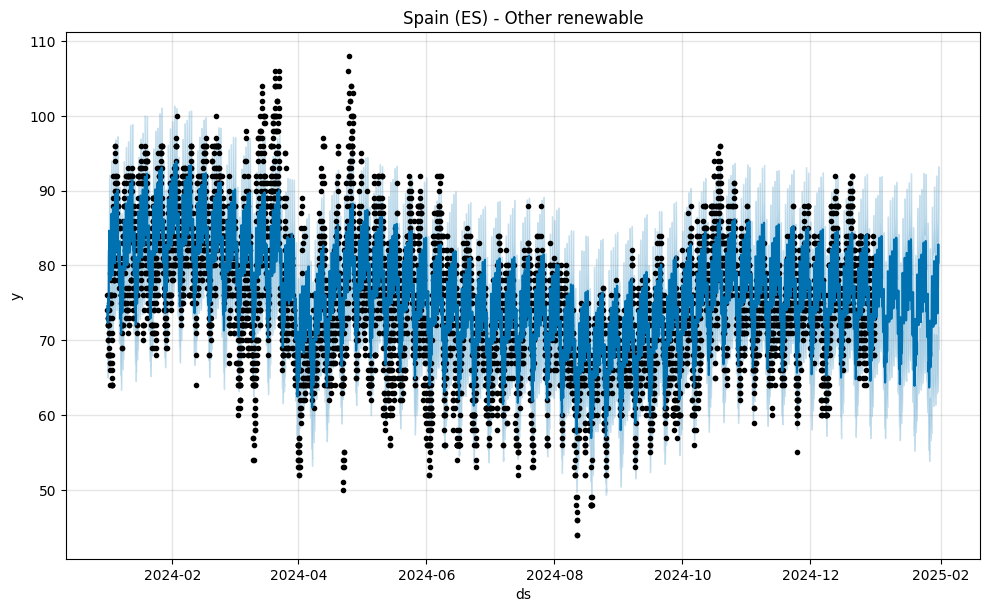

18:42:28 - cmdstanpy - INFO - Chain [1] start processing
18:42:29 - cmdstanpy - INFO - Chain [1] done processing


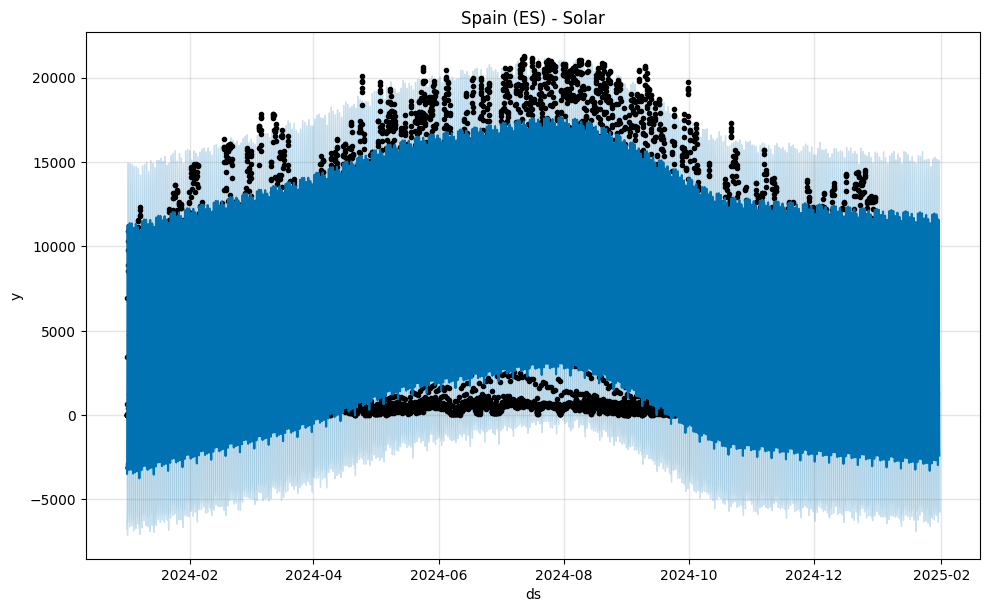

18:42:31 - cmdstanpy - INFO - Chain [1] start processing
18:42:34 - cmdstanpy - INFO - Chain [1] done processing


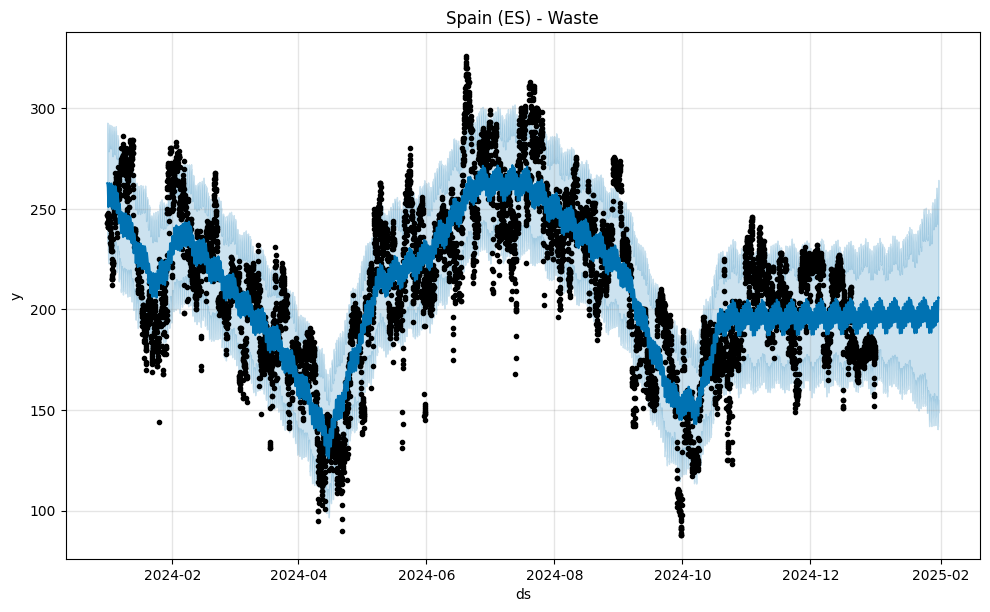

Skip Spain (ES) - Wind Offshore: Generation is 0 MW


18:42:36 - cmdstanpy - INFO - Chain [1] start processing
18:42:37 - cmdstanpy - INFO - Chain [1] done processing


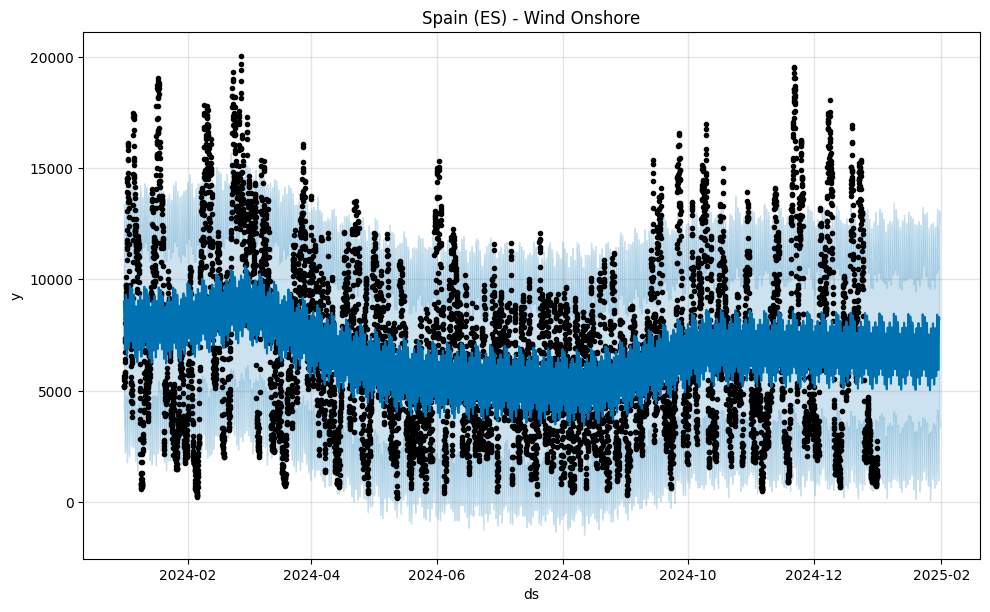

In [9]:
areas = df["Area"].unique()
types = df["Production Type"].unique()
for area in areas:
    for ptype in types:
        sub = df[(df["Area"] == area) & (df["Production Type"] == ptype)].copy()
        if sub.empty:
            continue

        # skip all 0 MW
        if (sub["Generation (MW)"].sum() == 0) or (sub["Generation (MW)"].max() == 0):
            print(f"Skip {area} - {ptype}: Generation is 0 MW")
            continue
        # skip all under 1000 MW
        if sub["Generation (MW)"].sum() < 1000:
            continue

        sub = sub.rename(columns={"datetime": "ds", "Generation (MW)": "y"})
        sub["ds"] = pd.to_datetime(sub["ds"])

        model = Prophet()
        model.fit(sub)
        future = model.make_future_dataframe(periods=24*30, freq='h')
        forecast = model.predict(future)

        model.plot(forecast)
        plt.title(f"{area} - {ptype}")
        plt.show()

18:42:40 - cmdstanpy - INFO - Chain [1] start processing
18:42:52 - cmdstanpy - INFO - Chain [1] done processing


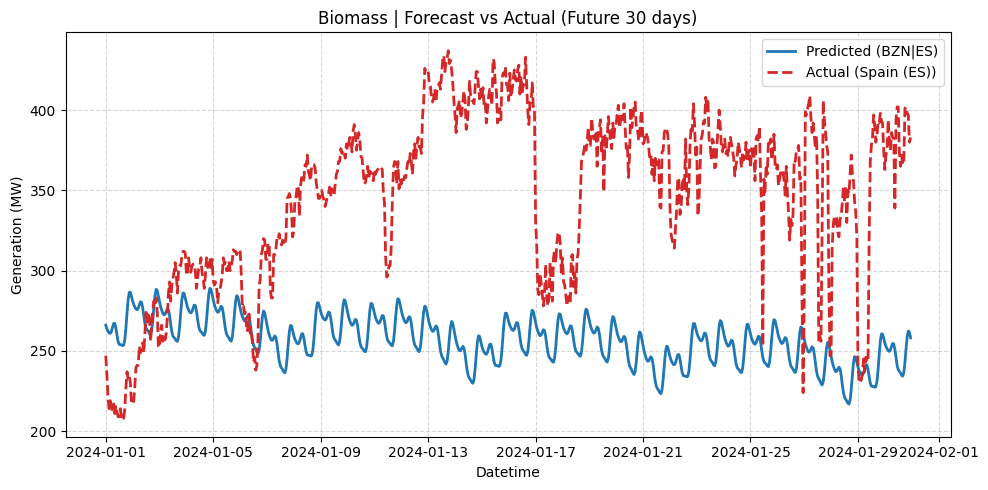

Biomass: MAE = 94.75 MW over 720 hours
Skip Fossil Brown coal/Lignite: 0 MW generation in BZN|ES
Skip Fossil Coal-derived gas: 0 MW generation in BZN|ES


18:42:55 - cmdstanpy - INFO - Chain [1] start processing
18:43:04 - cmdstanpy - INFO - Chain [1] done processing


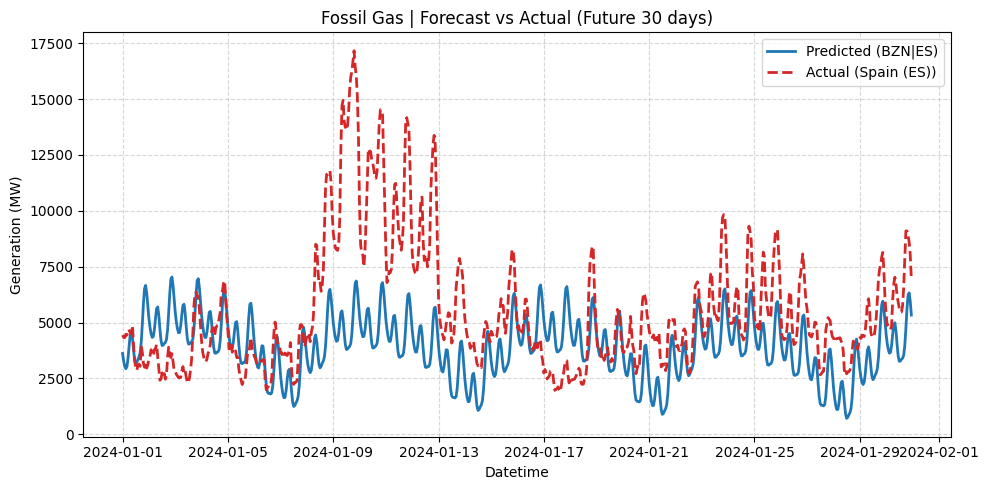

Fossil Gas: MAE = 2268.78 MW over 720 hours


18:43:07 - cmdstanpy - INFO - Chain [1] start processing
18:43:18 - cmdstanpy - INFO - Chain [1] done processing


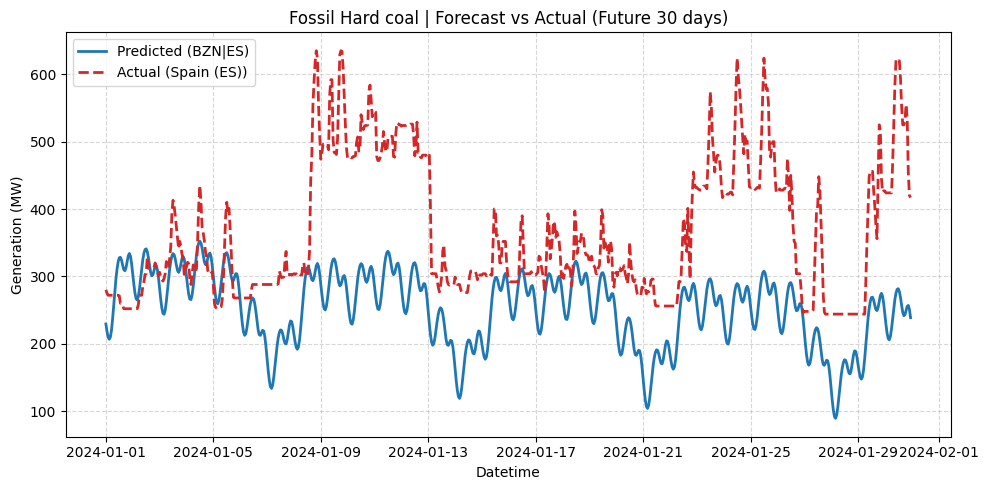

Fossil Hard coal: MAE = 116.92 MW over 720 hours


18:43:21 - cmdstanpy - INFO - Chain [1] start processing
18:43:29 - cmdstanpy - INFO - Chain [1] done processing


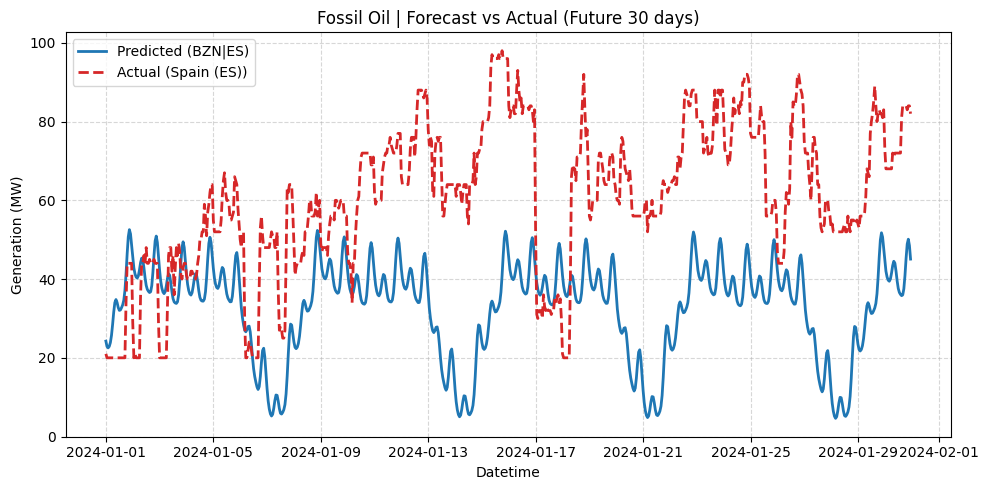

Fossil Oil: MAE = 30.21 MW over 720 hours
Skip Fossil Oil shale: 0 MW generation in BZN|ES
Skip Fossil Peat: 0 MW generation in BZN|ES
Skip Geothermal: 0 MW generation in BZN|ES


18:43:33 - cmdstanpy - INFO - Chain [1] start processing
18:43:34 - cmdstanpy - INFO - Chain [1] done processing


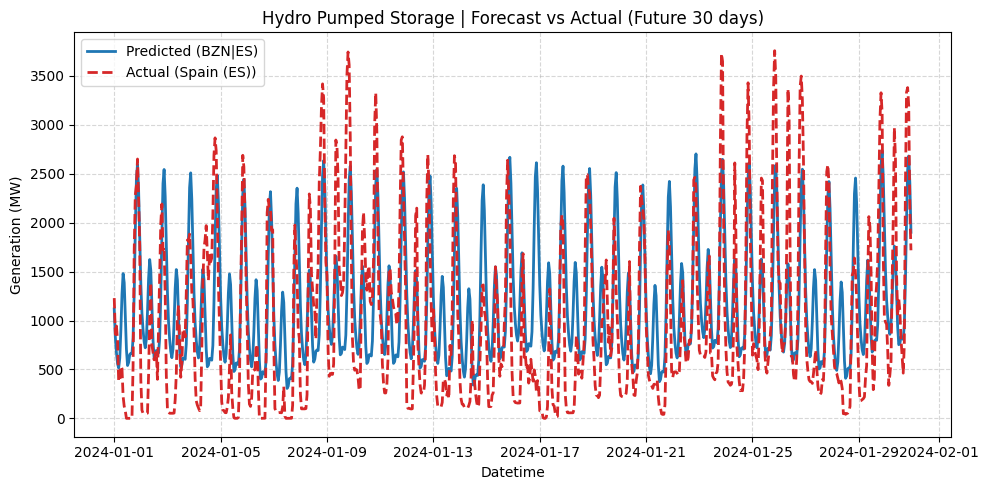

Hydro Pumped Storage: MAE = 539.53 MW over 720 hours


18:43:37 - cmdstanpy - INFO - Chain [1] start processing
18:43:49 - cmdstanpy - INFO - Chain [1] done processing


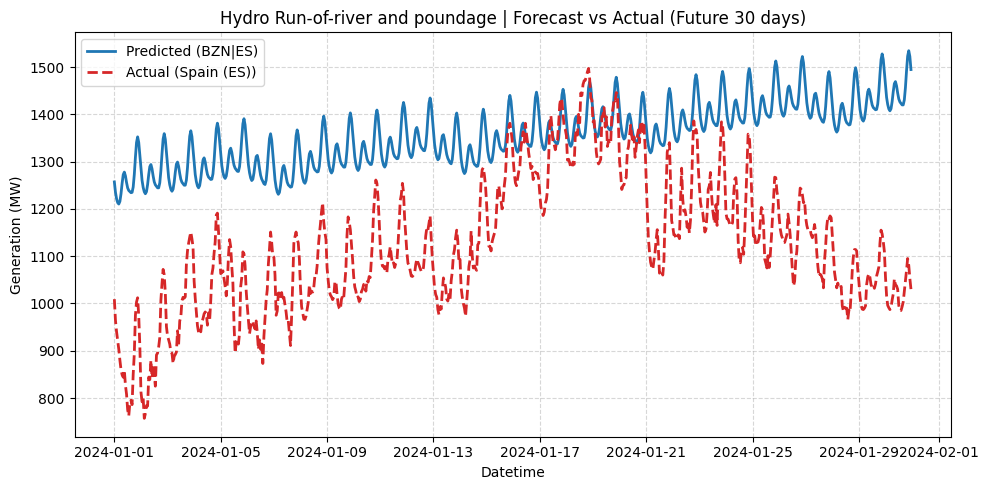

Hydro Run-of-river and poundage: MAE = 234.96 MW over 720 hours


18:43:53 - cmdstanpy - INFO - Chain [1] start processing
18:43:59 - cmdstanpy - INFO - Chain [1] done processing


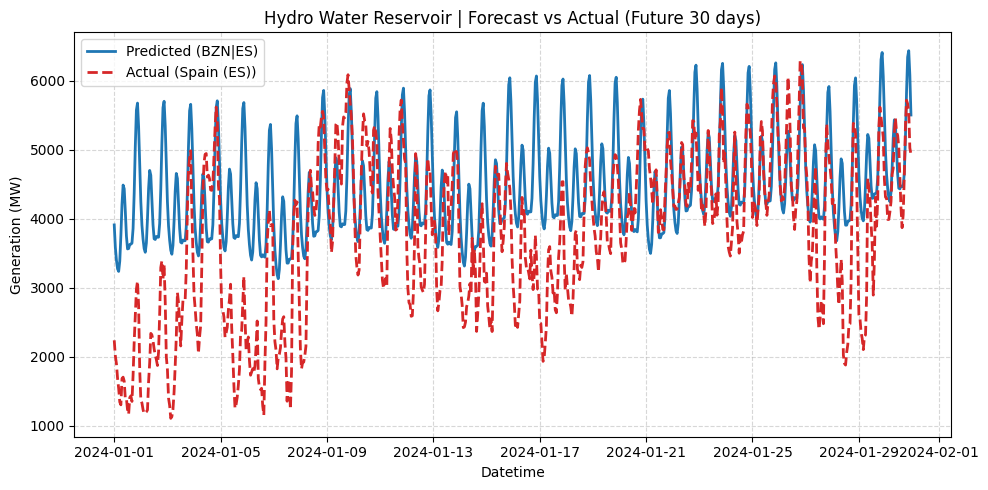

Hydro Water Reservoir: MAE = 931.36 MW over 720 hours
Skip Marine: 0 MW generation in BZN|ES


18:44:02 - cmdstanpy - INFO - Chain [1] start processing
18:44:13 - cmdstanpy - INFO - Chain [1] done processing


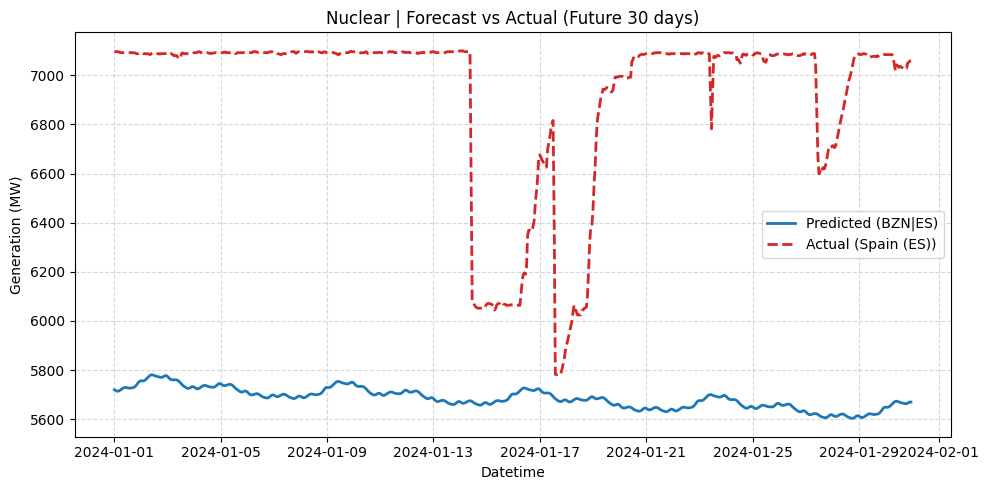

Nuclear: MAE = 1238.19 MW over 720 hours


18:44:17 - cmdstanpy - INFO - Chain [1] start processing
18:44:25 - cmdstanpy - INFO - Chain [1] done processing


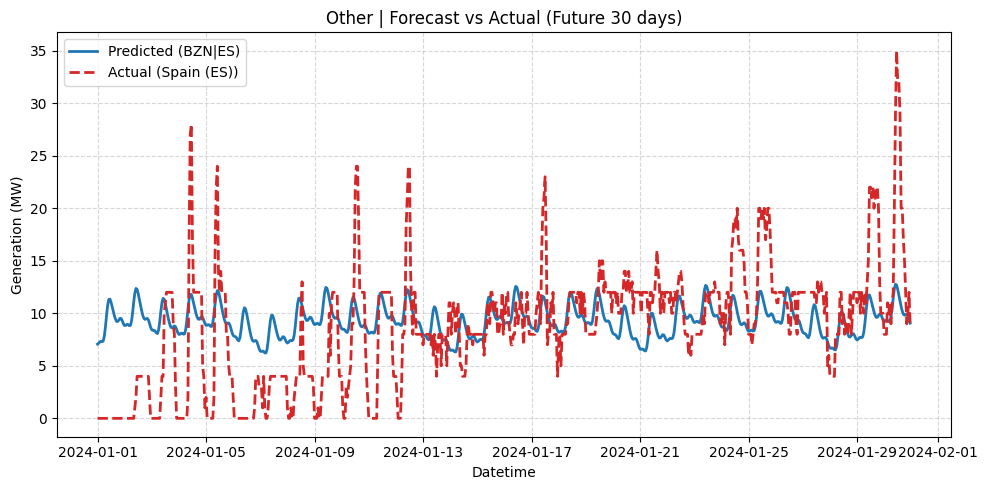

Other: MAE = 4.18 MW over 720 hours


18:44:28 - cmdstanpy - INFO - Chain [1] start processing
18:44:36 - cmdstanpy - INFO - Chain [1] done processing


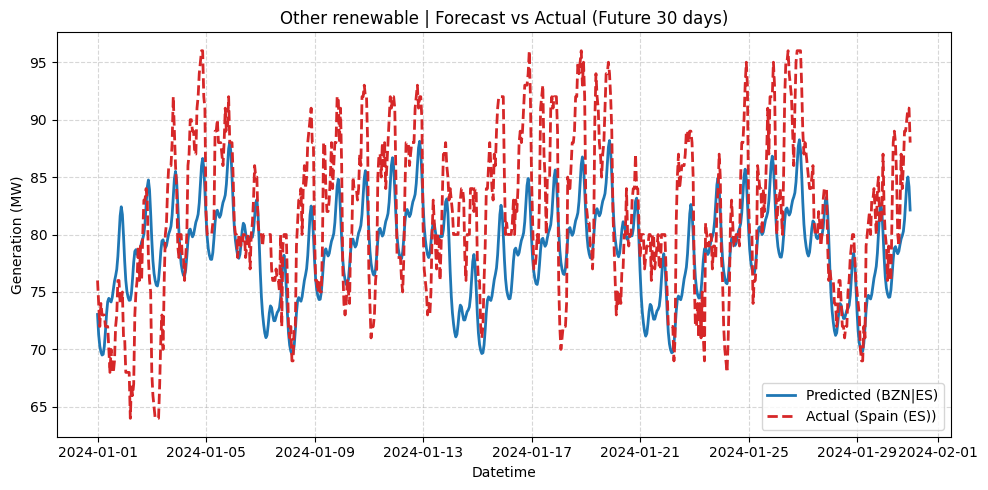

Other renewable: MAE = 4.93 MW over 720 hours


18:44:39 - cmdstanpy - INFO - Chain [1] start processing
18:44:45 - cmdstanpy - INFO - Chain [1] done processing


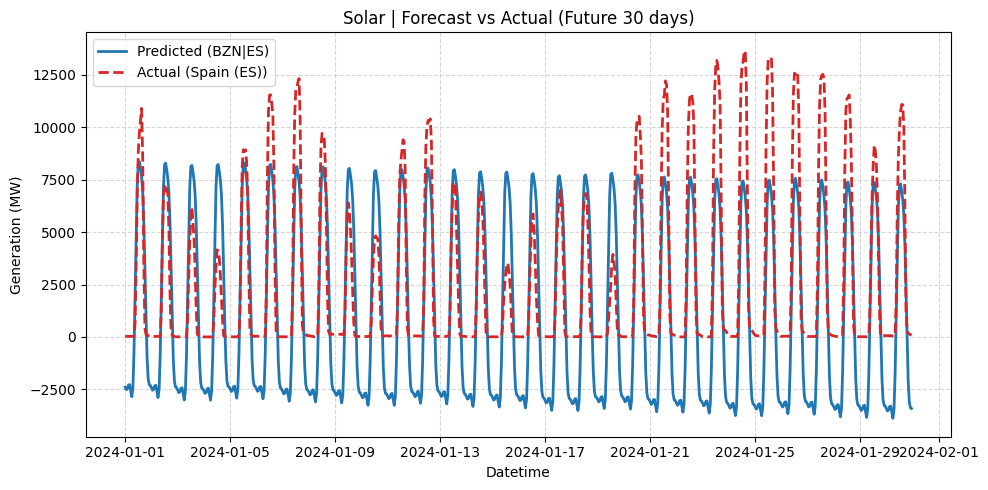

Solar: MAE = 2554.79 MW over 720 hours


18:44:49 - cmdstanpy - INFO - Chain [1] start processing
18:44:59 - cmdstanpy - INFO - Chain [1] done processing


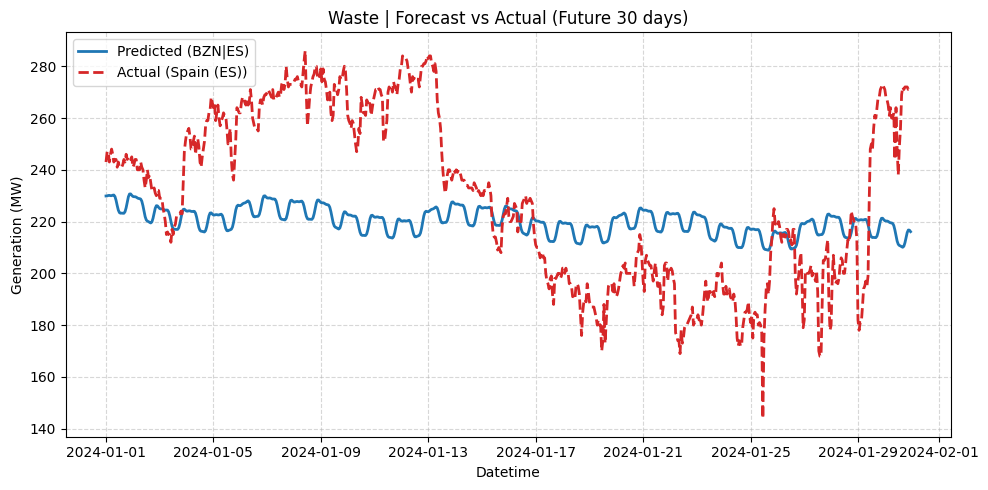

Waste: MAE = 28.37 MW over 720 hours
Skip Wind Offshore: 0 MW generation in BZN|ES


18:45:05 - cmdstanpy - INFO - Chain [1] start processing
18:45:10 - cmdstanpy - INFO - Chain [1] done processing


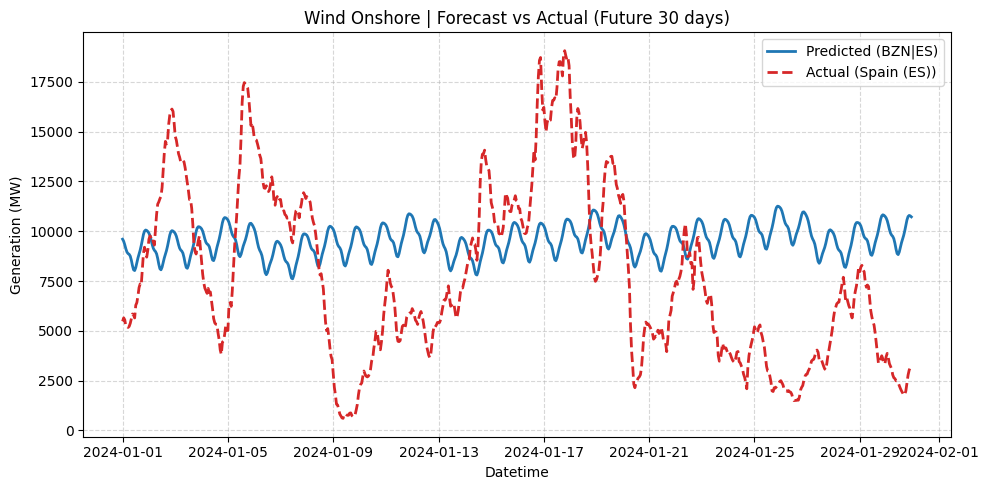

Wind Onshore: MAE = 4258.14 MW over 720 hours


In [10]:
areas = df["Area"].unique()
types = df["Production Type"].unique()

for ptype in types:
    # BZN|ES train,2022-2023
    train = df[(df["Area"] == "BZN|ES") & (df["Production Type"] == ptype)].copy()
    # Spain (ES) compare,2024
    compare = df[(df["Area"] == "Spain (ES)") & (df["Production Type"] == ptype)].copy()

    if train.empty or compare.empty:
        continue

    # skip lower ones
    if (train["Generation (MW)"].sum() == 0) or (train["Generation (MW)"].max() == 0):
        print(f"Skip {ptype}: 0 MW generation in BZN|ES")
        continue
    if train["Generation (MW)"].sum() < 1000:
        continue

    # Prophet
    train = train.rename(columns={"datetime": "ds", "Generation (MW)": "y"})
    train["ds"] = pd.to_datetime(train["ds"])
    compare["datetime"] = pd.to_datetime(compare["datetime"])

    # model training
    model = Prophet()
    model.fit(train)

    # 30d forecast
    future = model.make_future_dataframe(periods=24*30, freq='h')
    forecast = model.predict(future)
    forecast_tail = forecast.tail(24*30)[["ds", "yhat"]].copy()

    # actrual data
    compare_tail = compare[compare["datetime"].isin(forecast_tail["ds"])].copy()
    compare_tail = compare_tail.rename(columns={"datetime": "ds", "Generation (MW)": "actual"})

    # line up
    merged = pd.merge(forecast_tail, compare_tail, on="ds", how="inner")

    if merged.empty:
        print(f"NO MATCH FOUND {ptype}, SKIP")
        continue

    # diff
    merged["diff"] = merged["yhat"] - merged["actual"]

    # plot
    plt.figure(figsize=(10, 5))
    plt.plot(merged["ds"], merged["yhat"], label="Predicted (BZN|ES)", color="tab:blue", linewidth=2)
    plt.plot(merged["ds"], merged["actual"], label="Actual (Spain (ES))", color="tab:red", linestyle="--", linewidth=2)

    plt.title(f"{ptype} | Forecast vs Actual (Future 30 days)")
    plt.xlabel("Datetime")
    plt.ylabel("Generation (MW)")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()

    # debug
    mae = abs(merged["yhat"] - merged["actual"]).mean()
    print(f"{ptype}: MAE = {mae:.2f} MW over {len(merged)} hours")